<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2_8)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,89.026740,98.711073,0.000722,197.738535,197.736770,0.001765
1,0.0,1.0,48.951923,65.847182,-0.001178,124.797927,124.799706,-0.001779
2,0.0,2.0,70.084038,79.462703,0.007058,159.553799,159.546504,0.007294
3,0.0,3.0,86.439569,53.904629,-0.000229,150.343969,150.343598,0.000371
4,0.0,4.0,93.134129,23.047302,0.006035,126.187465,126.180841,0.006623
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,87.019535,43.588531,-0.001347,140.606718,140.608982,-0.002264
249996,999.0,246.0,28.661058,62.085564,-0.000278,100.746344,100.746768,-0.000423
249997,999.0,247.0,26.470430,51.630176,0.001769,88.102375,88.100820,0.001555
249998,999.0,248.0,48.401284,80.516380,-0.000075,138.917589,138.917854,-0.000264


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    89.026740  98.711073  0.000722  197.738535  197.736770  0.001765
      1.0    48.951923  65.847182 -0.001178  124.797927  124.799706 -0.001779
      2.0    70.084038  79.462703  0.007058  159.553799  159.546504  0.007294
      3.0    86.439569  53.904629 -0.000229  150.343969  150.343598  0.000371
      4.0    93.134129  23.047302  0.006035  126.187465  126.180841  0.006623
...                ...        ...       ...         ...         ...       ...
999.0 245.0  87.019535  43.588531 -0.001347  140.606718  140.608982 -0.002264
      246.0  28.661058  62.085564 -0.000278  100.746344  100.746768 -0.000423
      247.0  26.470430  51.630176  0.001769   88.102375   88.100820  0.001555
      248.0  48.401284  80.516380 -0.000075  138.917589  138.917854 -0.000264
      249.0  33.831134  71.350855  0.002195  115.184184  115.182107  0.002077

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    89.026740  98.711073  0.000722  197.738535  197.736770  0.001765
      1.0    48.951923  65.847182 -0.001178  124.797927  124.799706 -0.001779
      2.0    70.084038  79.462703  0.007058  159.553799  159.546504  0.007294
      3.0    86.439569  53.904629 -0.000229  150.343969  150.343598  0.000371
      4.0    93.134129  23.047302  0.006035  126.187465  126.180841  0.006623
...                ...        ...       ...         ...         ...       ...
999.0 245.0  87.019535  43.588531 -0.001347  140.606718  140.608982 -0.002264
      246.0  28.661058  62.085564 -0.000278  100.746344  100.746768 -0.000423
      247.0  26.470430  51.630176  0.001769   88.102375   88.100820  0.001555
      248.0  48.401284  80.516380 -0.000075  138.917589  138.917854 -0.000264
      249.0  33.831134  71.350855  0.002195  115.184184  115.182107  0.002077

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,89.026740,98.711073,0.000722,197.738535,197.736770,0.001765
1,0.0,1.0,48.951923,65.847182,-0.001178,124.797927,124.799706,-0.001779
2,0.0,2.0,70.084038,79.462703,0.007058,159.553799,159.546504,0.007294
3,0.0,3.0,86.439569,53.904629,-0.000229,150.343969,150.343598,0.000371
4,0.0,4.0,93.134129,23.047302,0.006035,126.187465,126.180841,0.006623
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,87.019535,43.588531,-0.001347,140.606718,140.608982,-0.002264
249996,999.0,246.0,28.661058,62.085564,-0.000278,100.746344,100.746768,-0.000423
249997,999.0,247.0,26.470430,51.630176,0.001769,88.102375,88.100820,0.001555
249998,999.0,248.0,48.401284,80.516380,-0.000075,138.917589,138.917854,-0.000264


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    89.026740  98.711073  0.000722  197.738535  197.736770  0.001765
      1.0    48.951923  65.847182 -0.001178  124.797927  124.799706 -0.001779
      2.0    70.084038  79.462703  0.007058  159.553799  159.546504  0.007294
      3.0    86.439569  53.904629 -0.000229  150.343969  150.343598  0.000371
      4.0    93.134129  23.047302  0.006035  126.187465  126.180841  0.006623
...                ...        ...       ...         ...         ...       ...
999.0 245.0  87.019535  43.588531 -0.001347  140.606718  140.608982 -0.002264
      246.0  28.661058  62.085564 -0.000278  100.746344  100.746768 -0.000423
      247.0  26.470430  51.630176  0.001769   88.102375   88.100820  0.001555
      248.0  48.401284  80.516380 -0.000075  138.917589  138.917854 -0.000264
      249.0  33.831134  71.350855  0.002195  115.184184  115.182107  0.002077

[250000 rows x 6 columns]

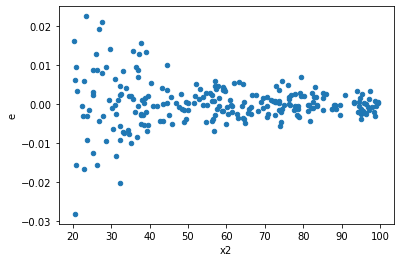

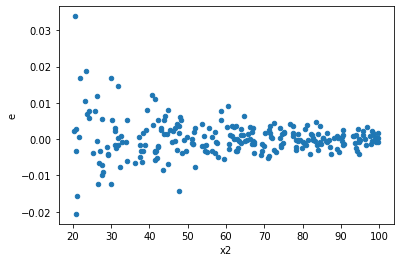

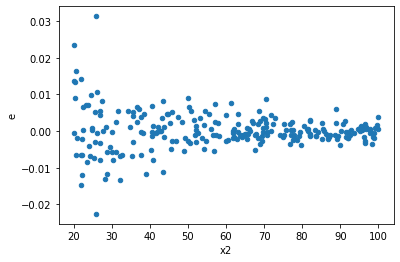

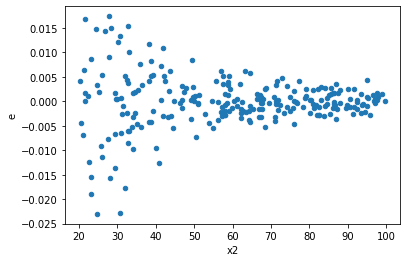

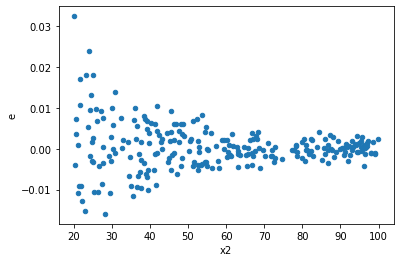

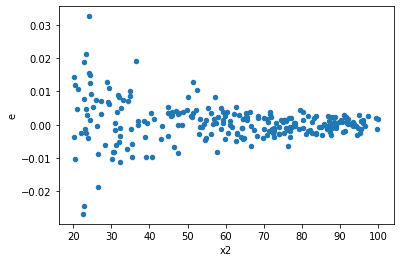

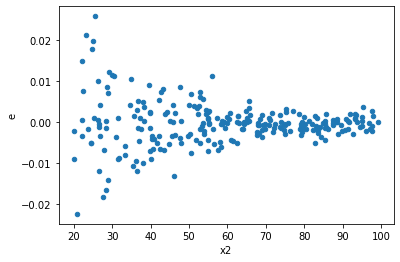

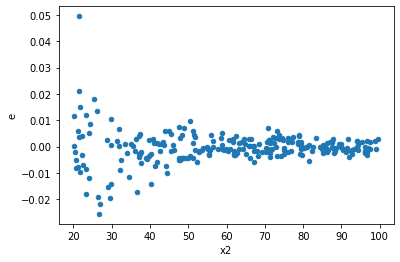

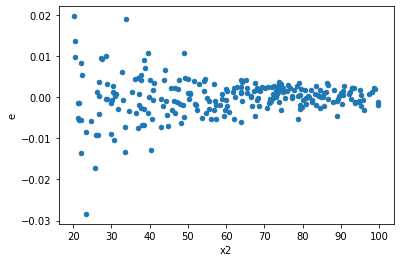

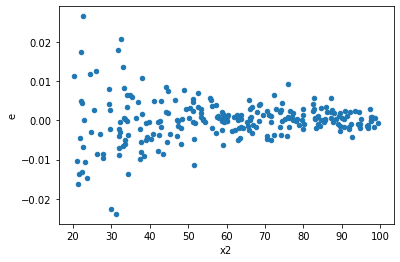

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,135.0,111.0,0.001891420838783723,0.0060472356383554455,1.4010524731731282e-05,5.4479600345544556e-05,3.888476797885964,1.511235581119763e-12,0.9999999999992444,7.556177905598815e-13,Reject005=0 : Heteroscedasticity
1.0,127.0,119.0,0.001414704046866268,0.005058293428699193,1.1139401943828882e-05,4.250666746806044e-05,3.815884163476901,1.185052056484892e-12,0.9999999999994075,5.92526028242446e-13,Reject005=0 : Heteroscedasticity
2.0,101.0,145.0,0.0006857436506072903,0.0062985393193349375,6.789541095121686e-06,4.3438202202309915e-05,6.397811220779037,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
3.0,117.0,129.0,0.0007656335089495852,0.006679001910923955,6.5438761448682494e-06,5.17752086118136e-05,7.912009253478316,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,133.0,113.0,0.0015022712359347588,0.006034780600829569,1.1295272450637285e-05,5.3405138060438666e-05,4.728096492920409,8.881784197001252e-16,0.9999999999999996,4.440892098500626e-16,Reject005=0 : Heteroscedasticity
5.0,118.0,128.0,0.001074122387891337,0.007523239321811467,9.102732100774042e-06,5.877530720165209e-05,6.456886410691378,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
13.0,125.0,121.0,0.001168227668762643,0.007107773337203557,9.345821350101143e-06,5.8741928406640966e-05,6.285368209612229,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
14.0,129.0,117.0,0.001359926653968269,0.00682653854313641,1.0542067085025342e-05,5.8346483274670174e-05,5.534634033732287,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
15.0,118.0,128.0,0.0009326233929474374,0.0037617107606034163,7.903588075825741e-06,2.938836531721419e-05,3.718357413780549,1.3993251002375473e-12,0.9999999999993003,6.996625501187737e-13,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,135.0,111.0,0.001891420838783723,0.0060472356383554455,1.4010524731731282e-05,5.4479600345544556e-05,3.888476797885964,1.511235581119763e-12,Reject005=0 : Heteroscedasticity
1.0,127.0,119.0,0.001414704046866268,0.005058293428699193,1.1139401943828882e-05,4.250666746806044e-05,3.815884163476901,1.185052056484892e-12,Reject005=0 : Heteroscedasticity
2.0,101.0,145.0,0.0006857436506072903,0.0062985393193349375,6.789541095121686e-06,4.3438202202309915e-05,6.397811220779037,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,117.0,129.0,0.0007656335089495852,0.006679001910923955,6.5438761448682494e-06,5.17752086118136e-05,7.912009253478316,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,133.0,113.0,0.0015022712359347588,0.006034780600829569,1.1295272450637285e-05,5.3405138060438666e-05,4.728096492920409,8.881784197001252e-16,Reject005=0 : Heteroscedasticity
5.0,118.0,128.0,0.001074122387891337,0.007523239321811467,9.102732100774042e-06,5.877530720165209e-05,6.456886410691378,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,118.0,128.0,0.005360926479305723,0.0019585808136580907,4.5431580333099344e-05,1.5301412606703833e-05,0.33680124033801073,5.35098426078958e-09,Reject005=0 : Heteroscedasticity
7.0,113.0,133.0,0.008173428002756266,0.001744886620422693,7.233122126332978e-05,1.3119448273854835e-05,0.18138015707065194,2.1996890752562953e-18,Reject005=0 : Heteroscedasticity
8.0,123.0,123.0,0.004498237957402622,0.0010643253587699047,3.6571040304086355e-05,8.653051697316299e-06,0.23660939435593328,1.7586177944937923e-14,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    998
Reject005=1 : Homoscedasticity        2
Name: Result_test, dtype: int64